# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])
df = df.sort_values('amount')

In [4]:
df

,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action
44,eosio.bpay,2022-11-12 20:13:25,2022-11-12 20:13:25,10.5684,EOS,eosio.bpay,truststaking,278212717,9a3ea613d79c0c51358a8703f4f72aeef4b7c14ad88cfe...,producer block pay,eosio.token,transfer
47,eosio.bpay,2022-11-13 20:13:30,2022-11-13 20:13:30,27.5441,EOS,eosio.bpay,truststaking,278385477,d756248c8ed1419dcdea06e6322594dd51865bb7660711...,producer block pay,eosio.token,transfer
46,eosio.bpay,2022-11-11 04:45:02,2022-11-11 04:45:02,32.2073,EOS,eosio.bpay,ivote4eosusa,277928657,5f2cf8c7975e53a542f5b4585fc4f1c9b7716d66c305b9...,producer block pay,eosio.token,transfer
59,eosio.bpay,2022-10-31 21:02:30,2022-10-31 21:02:30,86.1326,EOS,eosio.bpay,eosphereiobp,276146115,f8eff8dfd761844d0b2a0436276a8e3d7cde4ceb3c0acf...,producer block pay,eosio.token,transfer
16,eosio.vpay,2022-11-13 09:37:12,2022-11-13 09:37:12,106.3541,EOS,eosio.vpay,eosswedenorg,278309139,55abf890ecda7a6c47fa23989151355a888c302f6eb0f9...,producer vote pay,eosio.token,transfer
...,...,...,...,...,...,...,...,...,...,...,...,...
1,eosio.vpay,2022-10-29 00:04:36,2022-10-29 00:04:36,712.7486,EOS,eosio.vpay,newdex.bp,275650228,e03fd7db2f2ce23e6130d0afc5c3ee4d31ea6ae7e8c4de...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-11-01 00:05:18,2022-11-01 00:05:18,714.4640,EOS,eosio.vpay,newdex.bp,276168015,b9c981c0e545d2714d295960f95c064013ca55b849e833...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-11-02 00:05:19,2022-11-02 00:05:19,715.0651,EOS,eosio.vpay,newdex.bp,276340556,e246b1d13038bbabb33ba09c1a211ebbcd2d85940d7c76...,producer vote pay,eosio.token,transfer
67,eosio.bpay,2022-10-29 17:36:27,2022-10-29 17:36:27,1263.4297,EOS,eosio.bpay,bitfinexeos1,275776405,2a59efa7810dd5326a712a4aa926ebe5a200018c0702ae...,producer block pay,eosio.token,transfer


In [5]:
from pysankey import sankey
import seaborn as sns

In [6]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


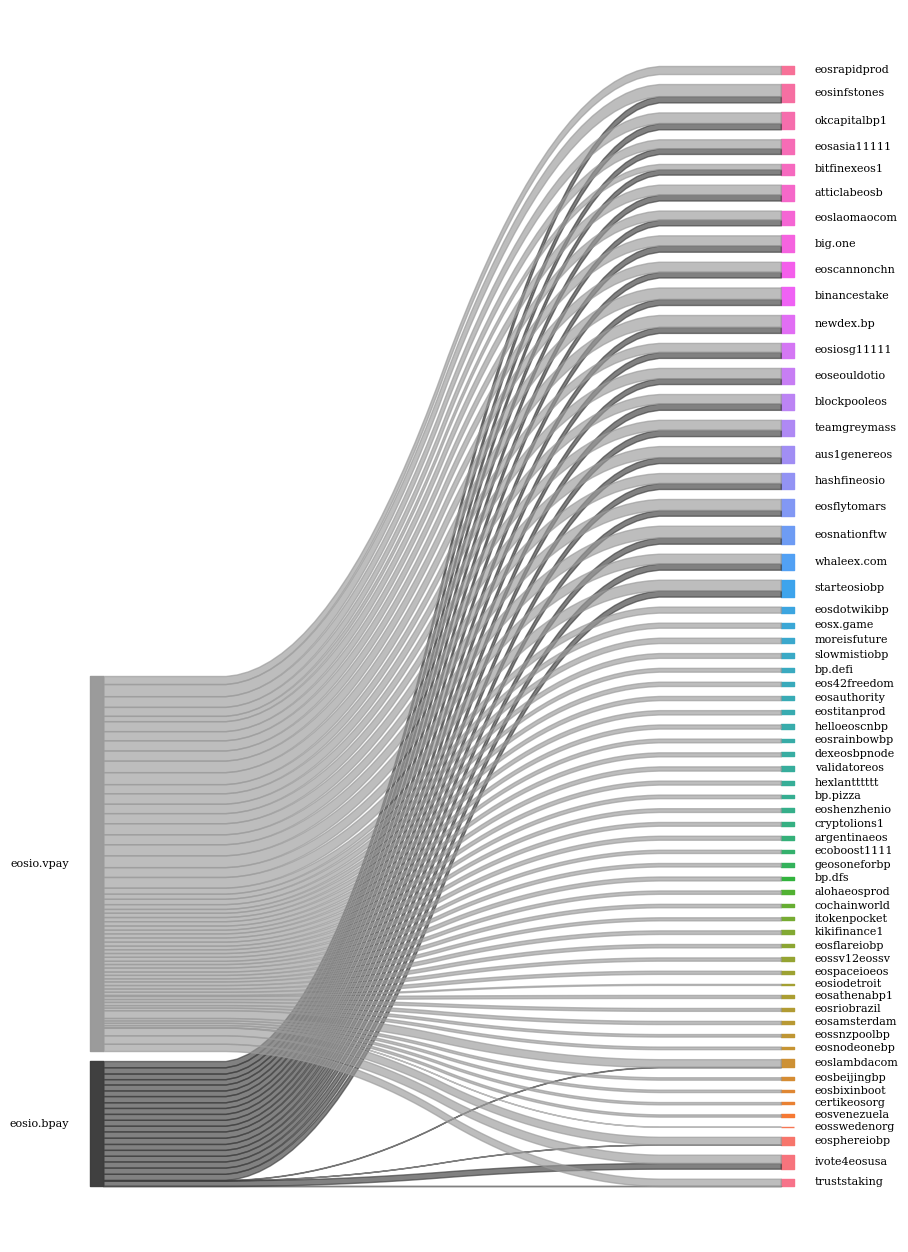

In [7]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)